# The Sparks Foundation: Data Science and Business Analytics Intern

## Author: Purvit Vashishtha

## Task 3: Exploratory Data Analysis - Retail

### Problem Statement: Perform Exploratory data analysis on data and try to find out weak areas where profit can be made.

## Data Preprocessing

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings(action="ignore")

In [2]:
# importing dataset
data = pd.read_csv("SampleSuperstore.csv")

In [3]:
#lets have a look at our dataset
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Furniture,Furnishings,48.8600,7.0,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Art,7.2800,4.0,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Technology,Phones,907.1520,6.0,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Binders,18.5040,3.0,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Appliances,114.9000,5.0,0.00,34.4700


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9416 non-null   object 
 1   Segment       9416 non-null   object 
 2   Country       9416 non-null   object 
 3   City          9416 non-null   object 
 4   State         9416 non-null   object 
 5   Postal Code   9415 non-null   float64
 6   Region        9415 non-null   object 
 7   Category      9415 non-null   object 
 8   Sub-Category  9415 non-null   object 
 9   Sales         9415 non-null   float64
 10  Quantity      9415 non-null   float64
 11  Discount      9415 non-null   float64
 12  Profit        9415 non-null   float64
dtypes: float64(5), object(8)
memory usage: 956.4+ KB


In [6]:
# Checking null values in our dataset
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     1
Region          1
Category        1
Sub-Category    1
Sales           1
Quantity        1
Discount        1
Profit          1
dtype: int64

In [7]:
# removing null values from dataset
df = data.dropna(axis=0)
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Furniture,Furnishings,48.8600,7.0,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Art,7.2800,4.0,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Technology,Phones,907.1520,6.0,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Binders,18.5040,3.0,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Appliances,114.9000,5.0,0.00,34.4700


In [8]:
# Statistical Info of our dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9415.000000,9415.000000,9415.000000,9415.000000,9415.000000
mean,55164.217950,230.673306,3.787679,0.156527,29.141801
std,32050.408371,630.543607,2.216279,0.206791,235.859398
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23101.500000,17.340000,2.000000,0.000000,1.724800
50%,57103.000000,54.528000,3.000000,0.200000,8.643600
75%,90004.000000,210.200000,5.000000,0.200000,29.341200
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Most Busy City
df["City"].describe()

count              9415
unique              524
top       New York City
freq                852
Name: City, dtype: object

## Data Visualization

<AxesSubplot:>

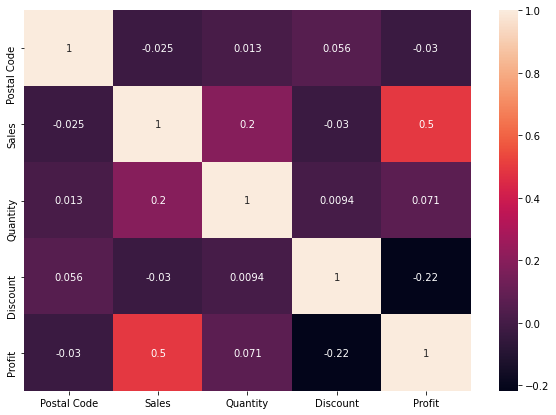

In [10]:
# heatmap of Correlation of data attributes
plt.figure(figsize=(10,7))
sns.heatmap(data = df.corr(), annot = True)

Text(0.5, 1.0, 'Countplot of Sub-Category')

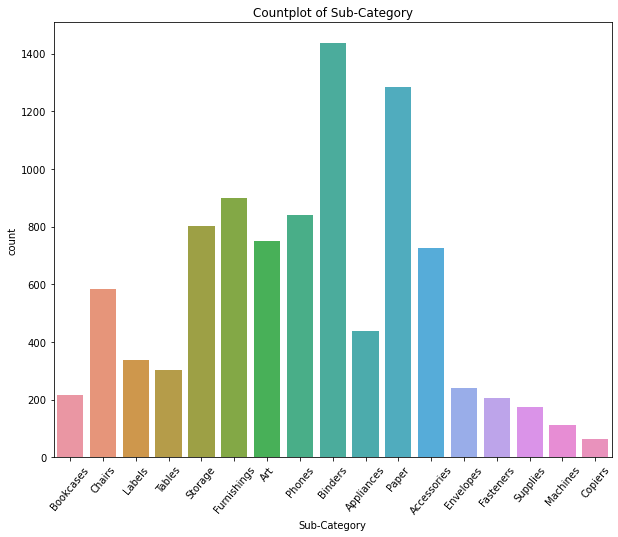

In [11]:
# Countplot for sub category
plt.figure(figsize=(10,8))
sns.countplot(df["Sub-Category"])
plt.xticks(rotation=50)
plt.title("Countplot of Sub-Category")

## Count Plots for every region

Text(0.5, 0, 'Category with respect to Region')

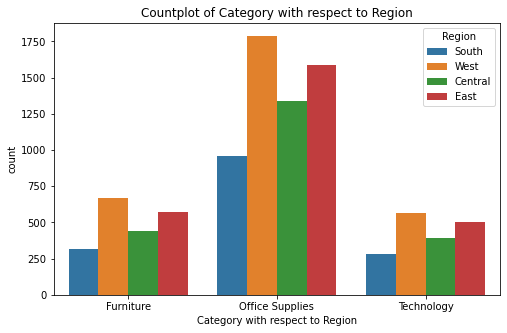

In [12]:
# count plot of Category for every region
plt.figure(figsize=(8,5))
sns.countplot(df["Category"], hue=df["Region"])
plt.title("Countplot of Category with respect to Region")
plt.xlabel("Category with respect to Region")

Text(0.5, 1.0, 'Customers with respect to Region')

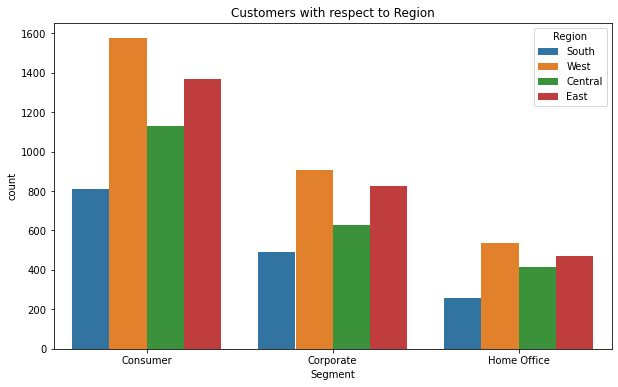

In [13]:
# count plot of Segment for every region
plt.figure(figsize=(10,6))
sns.countplot(df["Segment"], hue=df["Region"])
plt.title("Customers with respect to Region")

Text(0.5, 1.0, "Customer's preferred Shipping mode")

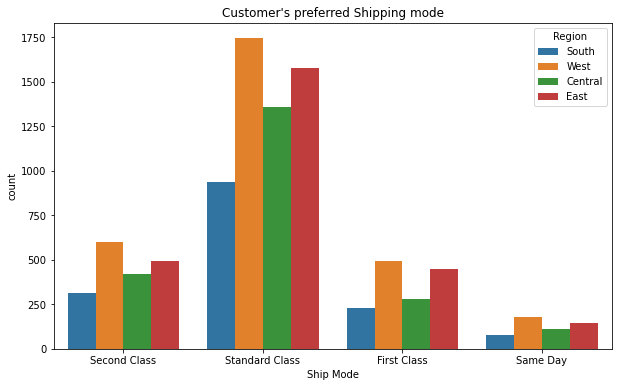

In [14]:
# count plot of Shipping mode for every region
plt.figure(figsize=(10,6))
sns.countplot(df["Ship Mode"], hue=df["Region"])
plt.title("Customer's preferred Shipping mode")

Text(0.5, 1.0, 'Category vs Sales')

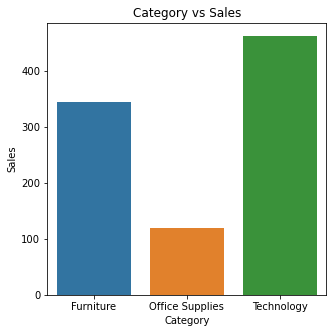

In [15]:
# Bar plot for category and sales
plt.figure(figsize=(5,5))
sns.barplot(x = df["Category"], y=df["Sales"],ci=False)
plt.title("Category vs Sales")

Text(0.5, 1.0, 'Sub Category vs Sales')

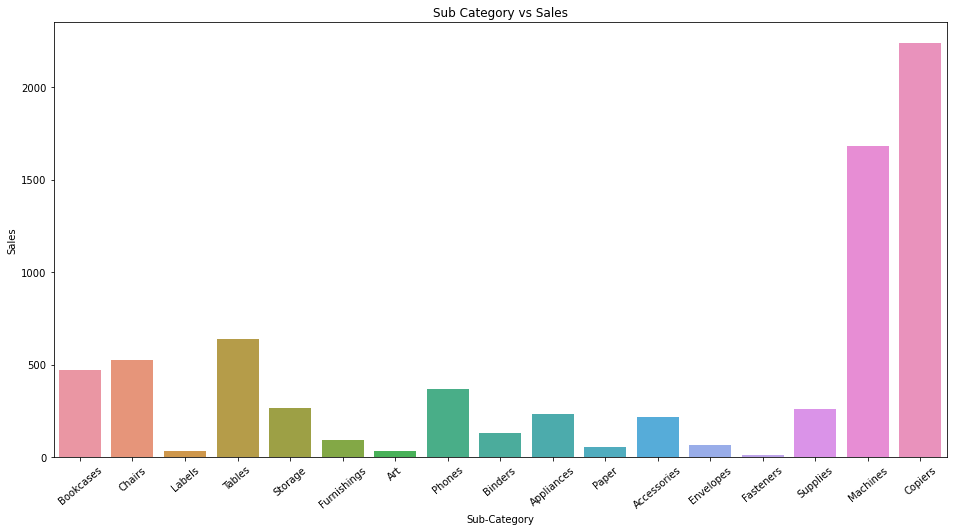

In [16]:
# Bar plot for sub-category and sales
plt.figure(figsize=(16,8))
sns.barplot(x = "Sub-Category", y="Sales",data = df,ci=False)
plt.xticks(rotation = 40)
plt.title("Sub Category vs Sales")

Profit:

Text(0.5, 1.0, 'Profit vs Category')

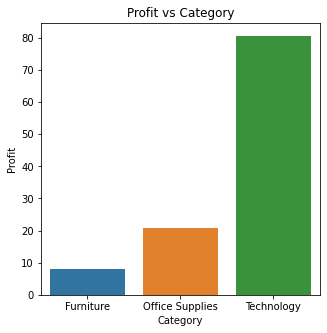

In [17]:
# Bar plot for category and profit
plt.figure(figsize=(5,5))
sns.barplot(x="Category",y="Profit", data=df,ci=False)
plt.title("Profit vs Category")

Text(0.5, 1.0, 'Sub Category vs Profit')

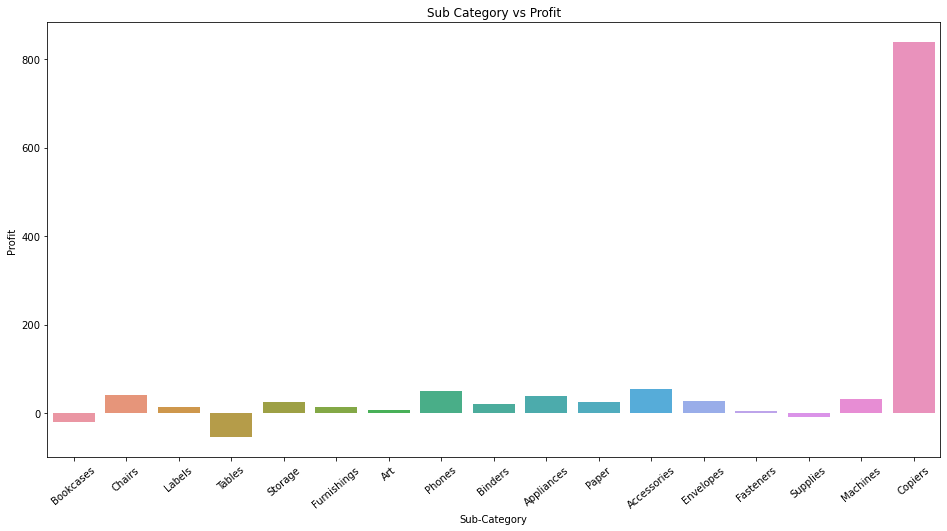

In [18]:
# Bar plot for sub-category and profit
plt.figure(figsize=(16,8))
sns.barplot(x="Sub-Category", y="Profit", data = df,ci=False)
plt.xticks(rotation=40)
plt.title("Sub Category vs Profit")

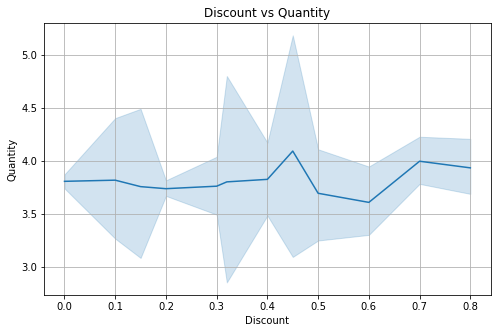

In [19]:
# line plot
plt.figure(figsize=(8,5))
sns.lineplot(x=df["Discount"] ,y=df["Quantity"])
plt.title("Discount vs Quantity")
plt.grid()

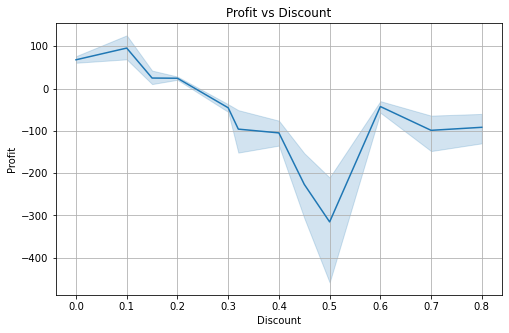

In [20]:
# Line plot
plt.figure(figsize=(8,5))
sns.lineplot(x="Discount", y="Profit", data = df)
plt.title("Profit vs Discount")
plt.grid()